In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load heart data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=24)

In [17]:
# Fit a random forest classifier while optimizing on f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, fbeta_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define grid search parameters
grid_params = {'n_estimators': [50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10],
              'min_samples_leaf': [1, 3, 5],
              'min_samples_split': [2, 5]}

# Instantiate grid search for k-NN, with 10-fold cross validation
gs = GridSearchCV(RandomForestClassifier(), grid_params, cv=5, scoring='f1',
                 verbose=1)

# Fit model using titanic data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [13]:
best_f1_params = gs.best_params_

In [14]:
clf = RandomForestClassifier(**best_f1_params)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
y_hat_test = clf.predict(X_test)

In [18]:
f1_score(y_test, y_hat_test)

0.8372093023255814

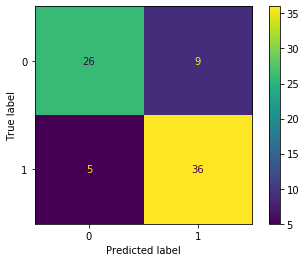

In [19]:
plot_confusion_matrix(clf, X_test, y_test)